## Concrete Strength Prediction

### Objective
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

### Resources Available
The data for this project is available in file https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/. The same has been shared along with the course content.

### Attribute Information:

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

  Name -- Data Type -- Measurement -- Description
- Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age(age) -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

In [1]:
#!pip install imblearn
#!pip install mlxtend

In [2]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from pandas_profiling import ProfileReport

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# load dataset
data = pd.read_csv('concrete.csv')
values = data.values

In [4]:
data.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0  141.30 212.00   0.00 203.50          0.00     971.80   748.50   28   
1  168.90  42.20 124.30 158.30         10.80   1,080.80   796.20   14   
2  250.00   0.00  95.70 187.40          5.50     956.90   861.20   28   
3  266.00 114.00   0.00 228.00          0.00     932.00   670.00   28   
4  154.80 183.40   0.00 193.30          9.10   1,047.40   696.70   28   
5  255.00   0.00   0.00 192.00          0.00     889.80   945.00   90   
6  166.80 250.20   0.00 203.50          0.00     975.60   692.60    7   
7  251.40   0.00 118.30 188.50          6.40   1,028.40   757.70   56   
8  296.00   0.00   0.00 192.00          0.00   1,085.00   765.00   28   
9  155.00 184.00 143.00 194.00          9.00     880.00   699.00   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99

### Steps and Tasks:

#### - Exploratory data quality report reflecting the following:


1. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers (10 Marks)


``
The independent attributes are lited below along with some information about each
    - Cement (cement) -- quantitative (float) -- kg in a m3 mixture -- Input Variable
    - Blast Furnace Slag (slag) -- quantitative (float) -- kg in a m3 mixture -- Input Variable
    - Fly Ash (ash) -- quantitative (float) -- kg in a m3 mixture -- Input Variable
    - Water (water) -- quantitative (float) -- kg in a m3 mixture -- Input Variable
    - Superplasticizer (superplastic) (float) -- quantitative -- kg in a m3 mixture -- Input Variable
    - Coarse Aggregate (coarseagg) (float) -- quantitative -- kg in a m3 mixture -- Input Variable
    - Fine Aggregate (fineagg) (float) -- quantitative -- kg in a m3 mixture -- Input Variable
    - Age(age) -- quantitative (int) -- Day (1~365) -- Input Variable
``

In [5]:
# Shape
data.shape

(1030, 9)

In [6]:
# Data types and count of missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [8]:
# Range of values observed, central values (mean and median (50%)), standard deviation and quartiles
data.describe().T

count   mean    std    min    25%    50%      75%      max
cement       1,030.00 281.17 104.51 102.00 192.38 272.90   350.00   540.00
slag         1,030.00  73.90  86.28   0.00   0.00  22.00   142.95   359.40
ash          1,030.00  54.19  64.00   0.00   0.00   0.00   118.30   200.10
water        1,030.00 181.57  21.35 121.80 164.90 185.00   192.00   247.00
superplastic 1,030.00   6.20   5.97   0.00   0.00   6.40    10.20    32.20
coarseagg    1,030.00 972.92  77.75 801.00 932.00 968.00 1,029.40 1,145.00
fineagg      1,030.00 773.58  80.18 594.00 730.95 779.50   824.00   992.60
age          1,030.00  45.66  63.17   1.00   7.00  28.00    56.00   365.00
strength     1,030.00  35.82  16.71   2.33  23.71  34.45    46.14    82.60

In [9]:
# Number of unique values in the variables
data.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [10]:
# Missing values
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

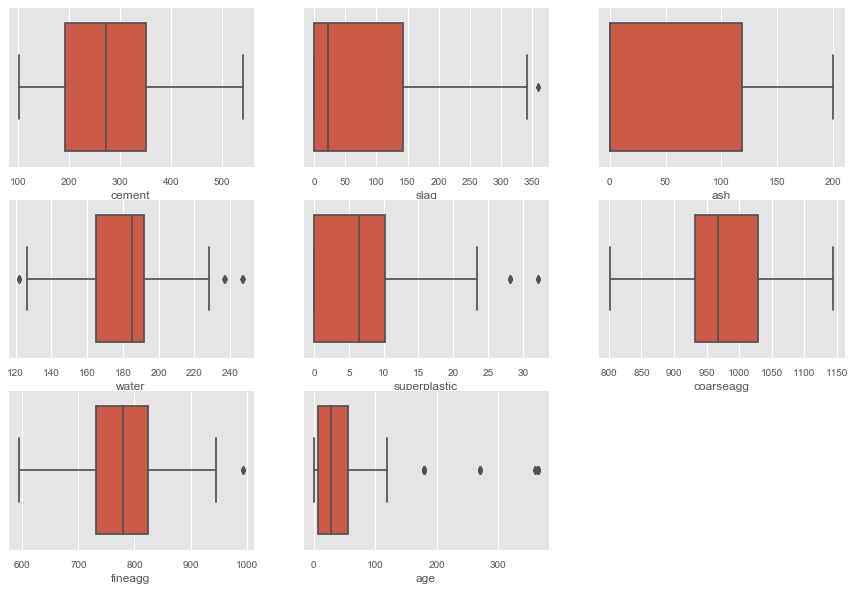

In [11]:
# Body of distributions / tails, outliers
plt.figure(figsize=(15,10))
pos = 1
for i in data.drop(columns = 'strength').columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(data[i])
    pos += 1 

In [12]:
# Number of duplicated rows
data.duplicated().sum()

25

In [13]:
data[data.duplicated()]

cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
278  425.00 106.30 0.00 153.50         16.50     852.10   887.10    3   
298  425.00 106.30 0.00 153.50         16.50     852.10   887.10    3   
400  362.60 189.00 0.00 164.90         11.60     944.70   755.80    3   
420  362.60 189.00 0.00 164.90         11.60     944.70   755.80    3   
463  362.60 189.00 0.00 164.90         11.60     944.70   755.80   56   
468  252.00   0.00 0.00 185.00          0.00   1,111.00   784.00   28   
482  425.00 106.30 0.00 153.50         16.50     852.10   887.10   91   
493  362.60 189.00 0.00 164.90         11.60     944.70   755.80   91   
517  425.00 106.30 0.00 153.50         16.50     852.10   887.10   56   
525  362.60 189.00 0.00 164.90         11.60     944.70   755.80   28   
527  425.00 106.30 0.00 153.50         16.50     852.10   887.10   91   
576  362.60 189.00 0.00 164.90         11.60     944.70   755.80    7   
577  425.00 106.30 0.00 153.50         16.50     852.10   887.10   28   
604  362.60 189.00 0.00 164.90         11.60     944.70   755.80   56   
733  362.60 189.00 0.00 164.90         11.60     944.70   755.80   91   
738  362.60 189.00 0.00 164.90         11.60     944.70   755.80   28   
766  362.60 189.00 0.00 164.90         11.60     944.70   755.80   91   
830  425.00 106.30 0.00 153.50         16.50     852.10   887.10    7   
880  425.00 106.30 0.00 153.50         16.50     852.10   887.10   56   
884  425.00 106.30 0.00 153.50         16.50     852.10   887.10    7   
892  362.60 189.00 0.00 164.90         11.60     944.70   755.80   56   
933  362.60 189.00 0.00 164.90         11.60     944.70   755.80    7   
943  362.60 189.00 0.00 164.90         11.60     944.70   755.80    3   
967  362.60 189.00 0.00 164.90         11.60     944.70   755.80   28   
992  425.00 106.30 0.00 153.50         16.50     852.10   887.10   28   

     strength  
278     33.40  
298     33.40  
400     35.30  
420     35.30  
463     77.30  
468     19.69  
482     65.20  
493     79.30  
517     64.30  
525     71.30  
527     65.20  
576     55.90  
577     60.29  
604     77.30  
733     79.30  
738     71.30  
766     79.30  
830     49.20  
880     64.30  
884     49.20  
892     77.30  
933     55.90  
943     35.30  
967     71.30  
992     60.29

#### More details can be found in the profiling report below

In [14]:
ProfileReport(data, title='Pandas Profiling Report', explorative=True)

In [15]:
# Drop duplicate records
data.drop_duplicates(subset=None, keep='first', inplace=True)

In [16]:
data.shape

(1005, 9)

In [17]:
# Outliers treatment - Capping 
cols_with_outliers = ['slag', 'ash', 'water', 'superplastic', 'fineagg', 'age']
for col in cols_with_outliers:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    
    upper_whisker = Q1-1.5*IQR
    lower_whisker = Q3+1.5*IQR
    
    # print(lower_whisker, upper_whisker)
    data[col] = data[col].clip(lower_whisker, upper_whisker)
data

cement   slag    ash  water  superplastic  coarseagg  fineagg    age  \
0     141.30 212.00   0.00 203.50          0.00     971.80   748.50  28.00   
1     168.90  42.20 124.30 158.30         10.80   1,080.80   796.20  14.00   
2     250.00   0.00  95.70 187.40          5.50     956.90   861.20  28.00   
3     266.00 114.00   0.00 228.00          0.00     932.00   670.00  28.00   
4     154.80 183.40   0.00 193.30          9.10   1,047.40   696.70  28.00   
...      ...    ...    ...    ...           ...        ...      ...    ...   
1025  135.00   0.00 166.00 180.00         10.00     961.00   805.00  28.00   
1026  531.30   0.00   0.00 141.80         25.00     852.10   893.70   3.00   
1027  276.40 116.00  90.30 179.60          8.90     870.10   768.30  28.00   
1028  342.00  38.00   0.00 228.00          0.00     932.00   670.00 129.50   
1029  540.00   0.00   0.00 173.00          0.00   1,125.00   613.00   7.00   

      strength  
0        29.89  
1        23.51  
2        29.22  
3        45.85  
4        18.29  
...        ...  
1025     13.29  
1026     41.30  
1027     44.28  
1028     55.06  
1029     52.61  

[1005 rows x 9 columns]

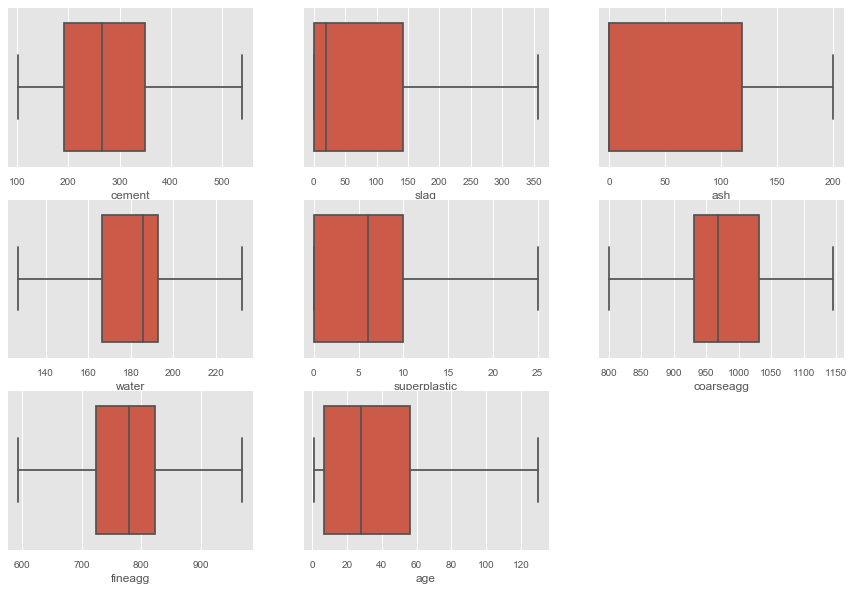

In [18]:
# Check after distribution cappig outliers
plt.figure(figsize=(15,10))
pos = 1
for i in data.drop(columns = 'strength').columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(data[i])
    pos += 1 

2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks)

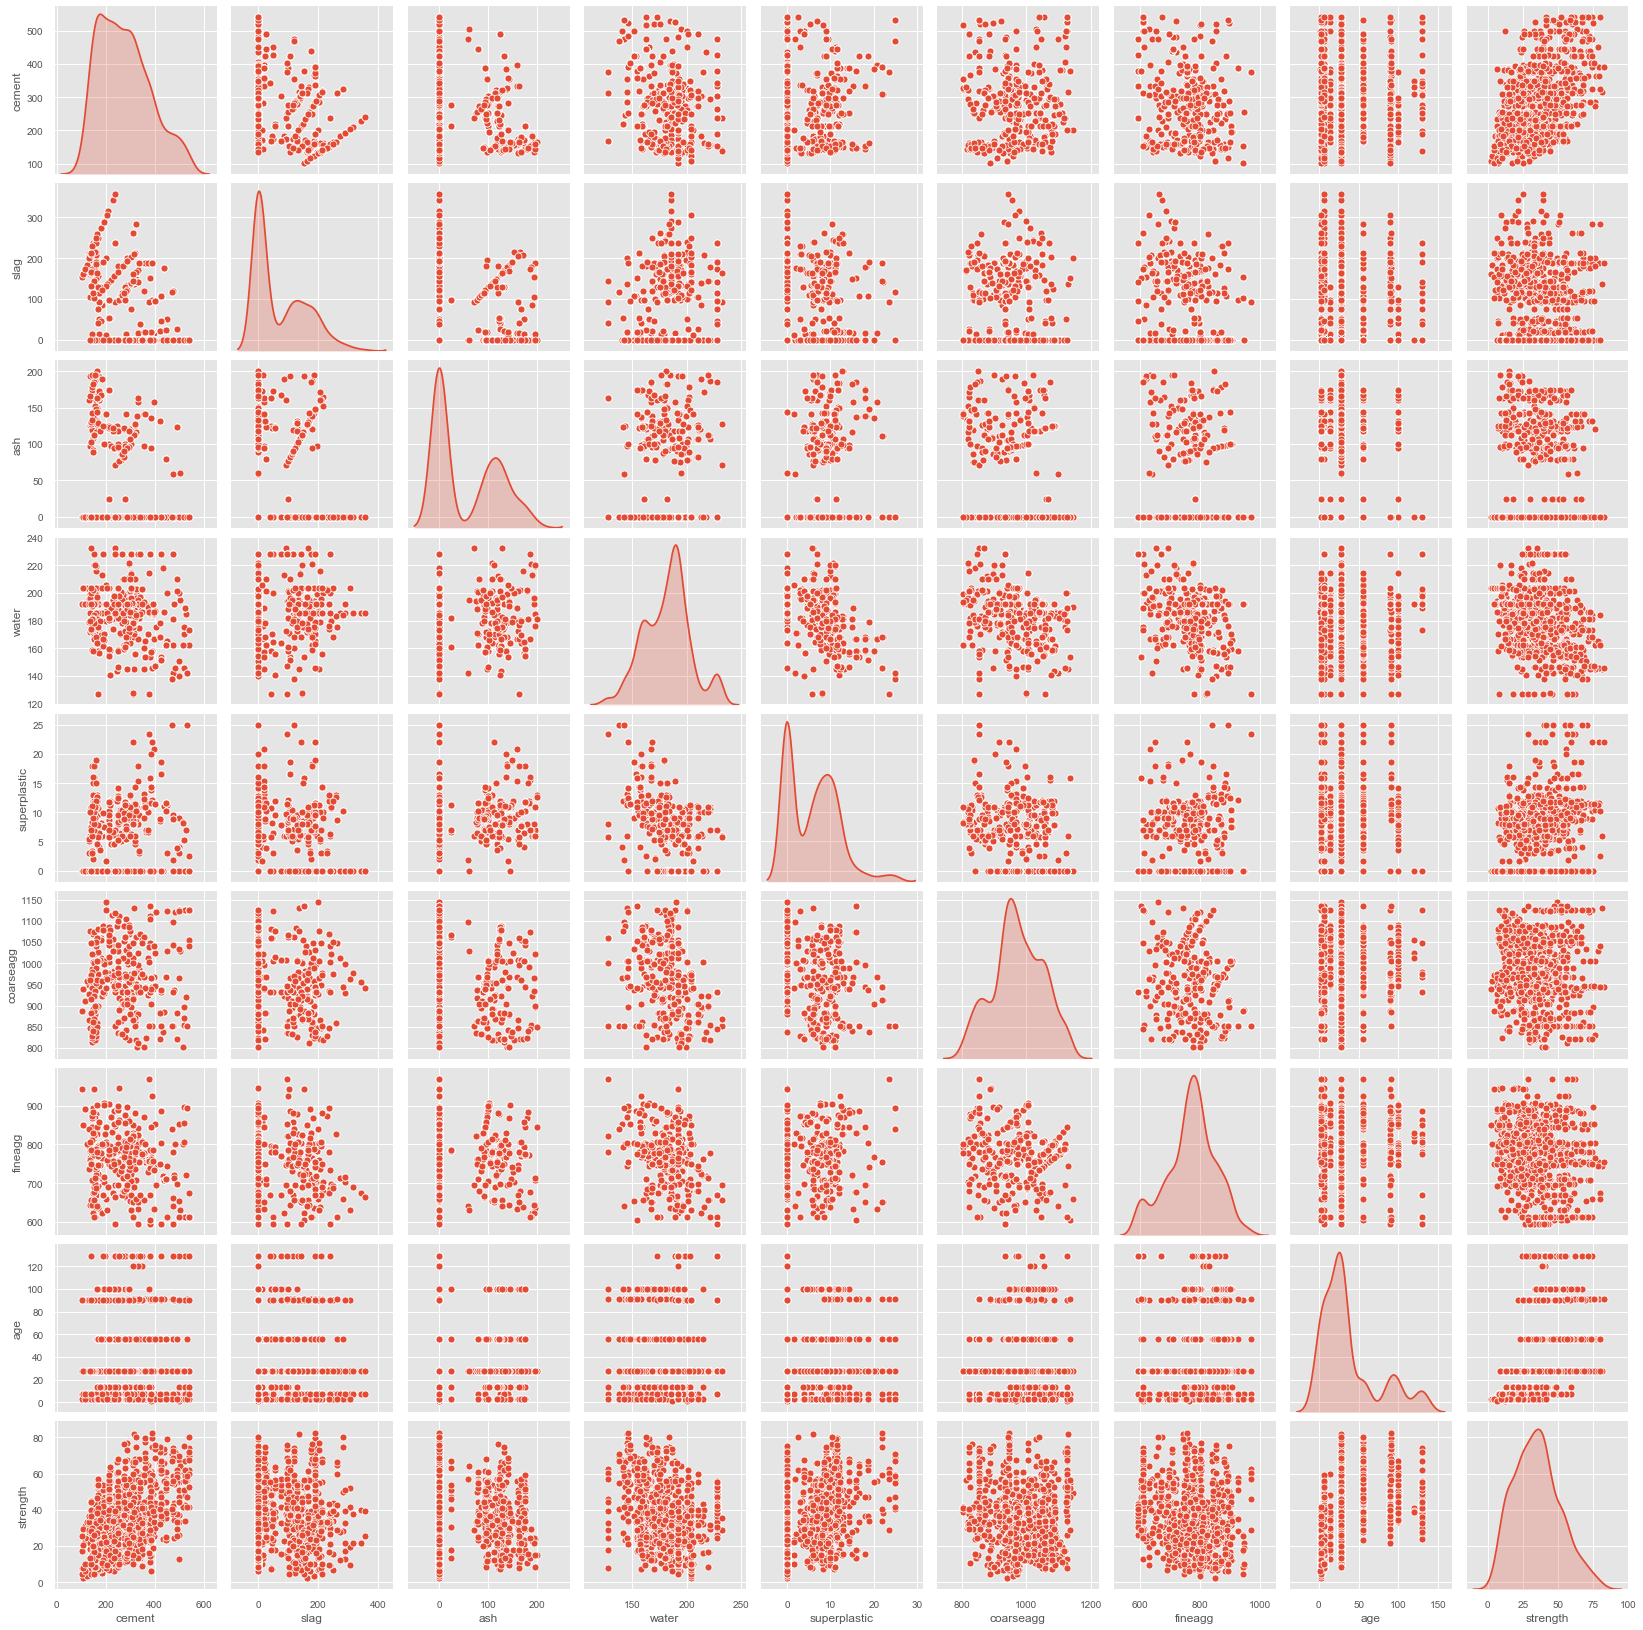

In [19]:
# Analysis of the relationship between variables
sns.pairplot(data, diag_kind= 'kde')
plt.show()

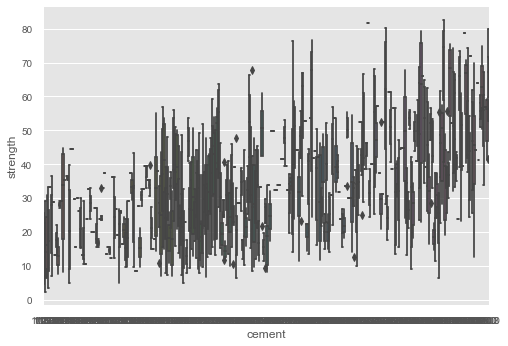

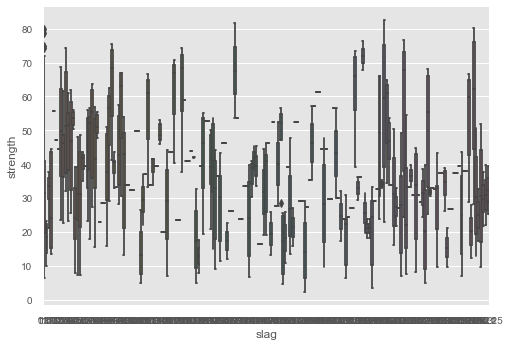

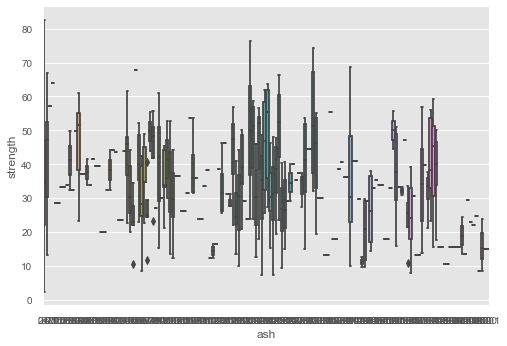

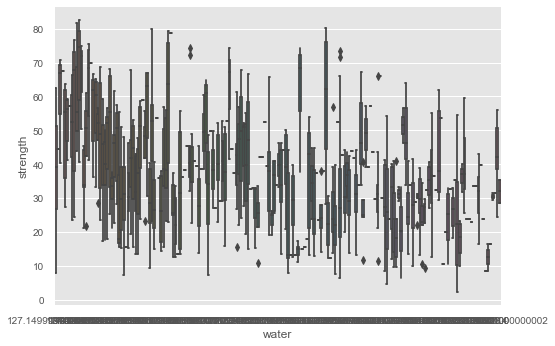

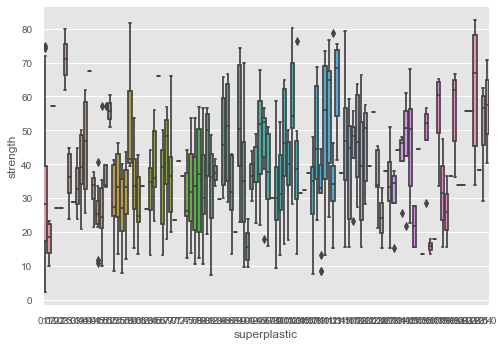

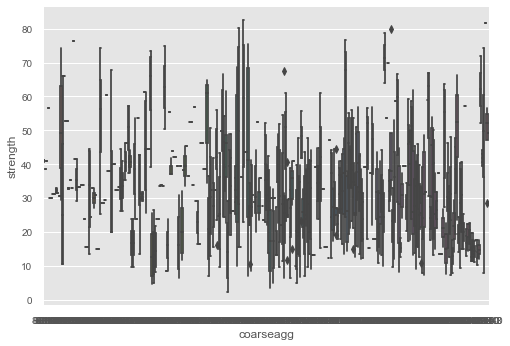

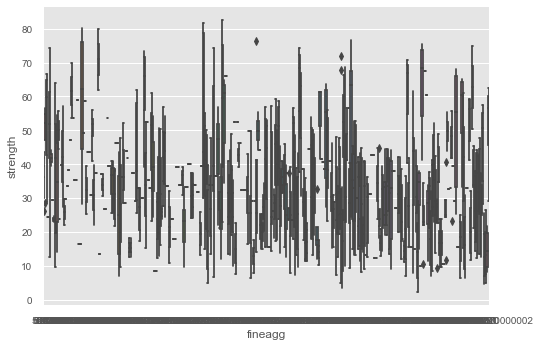

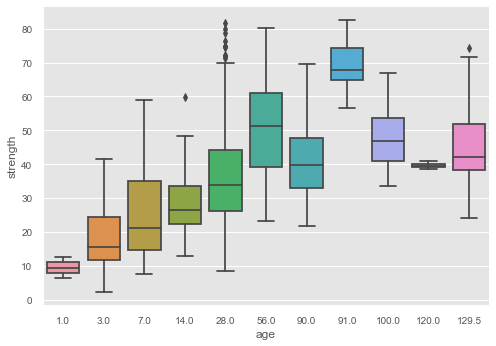

In [20]:
# Relationship between the each independent variable and the target 
for i in ['cement','slag','ash','water','superplastic','coarseagg', 'fineagg', 'age']:
    sns.boxplot(x=i, y='strength',data=data)
    plt.show()

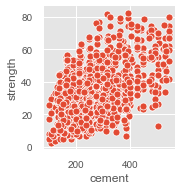

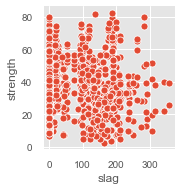

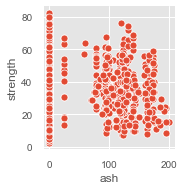

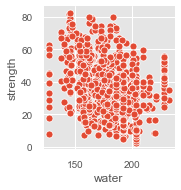

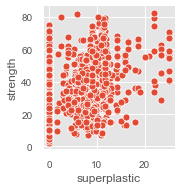

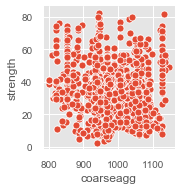

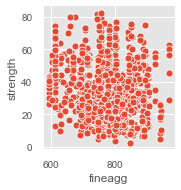

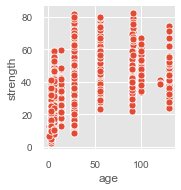

In [21]:
# Relationship between the each independent variable and the target 
for i in ['cement','slag','ash','water','superplastic','coarseagg', 'fineagg', 'age']:
    sns.pairplot(data=data,x_vars=[i],y_vars=['strength'])
    plt.show()

In [22]:
data.corr()

cement  slag   ash  water  superplastic  coarseagg  fineagg  \
cement          1.00 -0.30 -0.39  -0.06          0.04      -0.09    -0.25   
slag           -0.30  1.00 -0.31   0.13          0.02      -0.28    -0.29   
ash            -0.39 -0.31  1.00  -0.28          0.44      -0.03     0.09   
water          -0.06  0.13 -0.28   1.00         -0.66      -0.21    -0.44   
superplastic    0.04  0.02  0.44  -0.66          1.00      -0.24     0.20   
coarseagg      -0.09 -0.28 -0.03  -0.21         -0.24       1.00    -0.16   
fineagg        -0.25 -0.29  0.09  -0.44          0.20      -0.16     1.00   
age             0.06 -0.05 -0.09   0.19         -0.13       0.01    -0.10   
strength        0.49  0.10 -0.08  -0.27          0.34      -0.14    -0.19   

               age  strength  
cement        0.06      0.49  
slag         -0.05      0.10  
ash          -0.09     -0.08  
water         0.19     -0.27  
superplastic -0.13      0.34  
coarseagg     0.01     -0.14  
fineagg      -0.10     -0.19  
age           1.00      0.48  
strength      0.48      1.00

**Observations:**

From the figures and table above, it seems that strength is moderately positively correlated with cement, superplastic and age. There is also a weak negative correlation with water, coarseagg and fineagg.

3. Feature Engineering techniques (10 marks)

a. Identify opportunities (if any) to extract a new feature from existing features,
drop a feature (if required)

- The predictor variables with outliers have been teated using capping method.
- Duplicate records have been dropped.
- Based on the problem statement understanding, no features would be dropped.
- However, given the unfamiliarity with the domain of this business problem, it is difficult to impute the zero values in some of variables with any values as zeros *might* be valid for given instances, and would require a subject matter expert (SME) to decide if these material *must* be used as ingredients in cement or *could* be use.
- Hence, it is also difficult to extract new meaningful features from the existing ones given that the domain requires SMEs to understand the problem.
- However, feature selection technique has been applied to select the most important features. 


b. Get data model ready and do a train test split.

In [23]:
# Split the data into train, validation and test
X = data.iloc[:, 0:8].values 
y = data.iloc[:, 8].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

print('X: ', X.shape)
print('Y: ', y.shape)
print()
print('X_train: ', X_train.shape)
print('X_val: ', X_val.shape)
print('X_test: ', X_test.shape)
print()
print('y_train: ', y_train.shape)
print('y_val: ', y_val.shape)
print('y_test: ', y_test.shape)

X:  (1005, 8)
Y:  (1005,)

X_train:  (527, 8)
X_val:  (176, 8)
X_test:  (302, 8)

y_train:  (527,)
y_val:  (176,)
y_test:  (302,)


### Feature Selection

In [24]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
x = data.drop('strength', axis = 1)
y = data['strength']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (703, 8) (703,)
Testing dataset shape: (302, 8) (302,)


In [25]:
# Build Linear Regression to use in feature selection
lr = LinearRegression()
# Build step forward feature selection
sfs1 = sfs(lr, k_features=5, forward=True, scoring='r2', cv=5)
# Perform SFFS
sfs1 = sfs1.fit(x_train.values, y_train.values)
sfs1.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.29103203, 0.12940783, 0.3272273 , 0.28980092, 0.27793225]),
  'avg_score': 0.26308006636836134,
  'feature_names': ('0',),
  'ci_bound': 0.08848747331696936,
  'std_dev': 0.06884626045090293,
  'std_err': 0.03442313022545146},
 2: {'feature_idx': (0, 7),
  'cv_scores': array([0.45578194, 0.36341757, 0.52792326, 0.46958848, 0.41969254]),
  'avg_score': 0.44728075616193463,
  'feature_names': ('0', '7'),
  'ci_bound': 0.07008610525644061,
  'std_dev': 0.05452937094485867,
  'std_err': 0.027264685472429336},
 3: {'feature_idx': (0, 4, 7),
  'cv_scores': array([0.58544748, 0.56074095, 0.68734083, 0.59371876, 0.53878484]),
  'avg_score': 0.5932065719622189,
  'feature_names': ('0', '4', '7'),
  'ci_bound': 0.06537941555963485,
  'std_dev': 0.05086740645902529,
  'std_err': 0.025433703229512643},
 4: {'feature_idx': (0, 1, 4, 7),
  'cv_scores': array([0.63629487, 0.61554072, 0.74915114, 0.69984661, 0.63890078]),
  'avg_score': 0.6679468246549

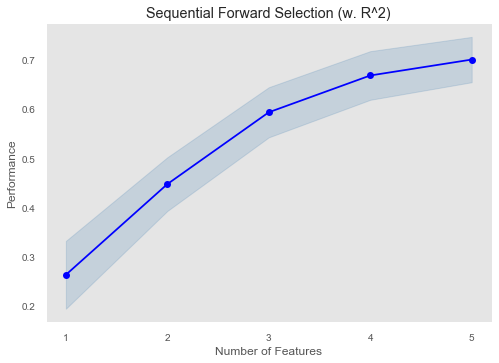

In [26]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [27]:
# Which features?
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 3, 4, 7]


In [28]:
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['cement', 'slag', 'water', 'superplastic', 'age']


In [29]:
# Build Model using the features above
linR = LinearRegression()
linR.fit(x_train[subsetColumnList], y_train)

y_train_pred = linR.predict(x_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % linR.score(x_train[subsetColumnList], y_train))

y_test_pred = linR.predict(x_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % linR.score(x_test[subsetColumnList], y_test))

Training accuracy on selected features: 0.707
Testing accuracy on selected features: 0.645


In [30]:
# Store the metrics results for this model in the dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Linear Regression'], 
                          'R-sq': linR.score(x_test[subsetColumnList], y_test)})
resultsDf = resultsDf[['Method','R-sq']]
resultsDf                          

Method  R-sq
0  Linear Regression  0.64

c. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.

#### - Creating the model and tuning it
1. Algorithms that you think will be suitable for this project (at least 3 algorithms).
Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (15 marks)

The models that will be experiemtned with to predict a continous variable (strength) are the following:
    - Linear Regression
    - Decision Tree Regressor
    - Random Forest Regressor
and the metric that will be used for comparison is accuracy (R^2).

### LR - Adding interaction terms 

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(x_train)
X_test2 = poly.fit_transform(x_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8030284152004662
0.7381251018367477


In [32]:
# but this improves as the cost of 29 extra variables!
print(x_train.shape)
print(X_train2.shape)

(703, 8)
(703, 37)


In [33]:
# Store the metrics results for this model in the dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['LR Poly'], 
                          'R-sq': poly_clf.score(X_test2, y_test)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'R-sq']]
resultsDf

Method  R-sq
0  Linear Regression  0.64
0            LR Poly  0.74

### Tree Regressor

In [34]:
regressor = DecisionTreeRegressor(criterion='mse', random_state=0)
regressor.fit(x_train, y_train)

cross_val_score(regressor, x, y, cv=10)

array([0.76099357, 0.85560144, 0.93400423, 0.83425527, 0.83629896,
       0.87420224, 0.89620605, 0.86554756, 0.83016893, 0.87905825])

In [35]:
print(regressor.score(x_train, y_train))
print(regressor.score(x_test, y_test))

0.9956764145576433
0.7767000462446184


In [36]:
# Regularization
regressor = DecisionTreeRegressor(criterion = 'mse', max_depth = 10, random_state=0)
regressor.fit(x_train, y_train)
print(regressor.score(x_train, y_train))

reg_sc = regressor.score(x_test, y_test)
print(reg_sc)

0.9795295105738717
0.7516998575263947


In [37]:
tempResultsDf = pd.DataFrame({'Method':['DT Regressor'], 
                          'R-sq': regressor.score(x_test, y_test)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method','R-sq']]

### RandomForestRegressor

In [38]:
rfreg = RandomForestRegressor(n_jobs=-1,n_estimators=500,criterion="mae",random_state=0)
rfm=rfreg.fit(x_train, y_train)

print(rfreg.score(x_train, y_train))
print(rfreg.score(x_test, y_test))


0.9838137134511737
0.8918473648701593


In [39]:
tempResultsDf = pd.DataFrame({'Method':['RF Regressor'], 
                          'R-sq': rfreg.score(x_test, y_test)})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method','R-sq']]

In [40]:
resultsDf

Method  R-sq
0  Linear Regression  0.64
0            LR Poly  0.74
0       DT Regressor  0.75
0       RF Regressor  0.89

### KFold Cross Validation

In [42]:
# Linear Regression
array = data.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.70, random_state=0)

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = LinearRegression()
results = cross_val_score(model, X, Y, cv=kfold)

print(results)
print("\nAccuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


# Store the metrics results for this model in the dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Linear Regression'], 
                          'cross_val_score': results.mean()*100.0})
resultsDf = resultsDf[['Method', 'cross_val_score']]

[0.32419299 0.62597831 0.4399583  0.66130054 0.74959414 0.81239419
 0.69181328 0.64983019 0.84138974 0.66836331 0.76472677 0.89076788
 0.82618672 0.78335661 0.76752668 0.74686255 0.50510185 0.56020951
 0.74575882 0.83420176 0.8399998  0.78398562 0.63444837 0.62710226
 0.32755212 0.66082471 0.78775696 0.82393862 0.74677429 0.74905807
 0.55551718 0.83845964 0.8063523  0.71560217 0.69592296 0.59967012
 0.71927435 0.6110605  0.62179444 0.78420461 0.59263601 0.52164108
 0.76972634 0.49699397 0.63223384 0.79223297 0.64287648 0.4397484
 0.66638898 0.68902087]

Accuracy: 68.125% (13.014%)


In [44]:
# Linear Regression - Plynomial

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

array = data.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.70, random_state=0)

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = LinearRegression()
#x=poly_clf.fit(X_train2, y_train)

results = cross_val_score(poly_clf, X_train2, Y_train, cv=kfold)
print(results)
print("\nAccuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

tempResultsDf = pd.DataFrame({'Method':['Poly LR'], 
                          'accuracy': results.mean()*100.0})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

[ 0.37711541  0.63946469 -1.84323273  0.7333982   0.74772435  0.87902761
  0.82396385  0.7806566   0.89039167  0.82681834  0.65246604  0.88293593
  0.41435414  0.29766517  0.04989848  0.84519343 -0.02391727  0.22577291
  0.75081512  0.76585458  0.93341392  0.87425808  0.95637361  0.90426216
  0.79023074  0.54357645  0.5653801   0.09819709  0.73765336  0.38135607
  0.6690805   0.78857364  0.61996159  0.44684888  0.81486367  0.79889755
  0.90650074  0.81417825  0.7162962   0.55209009  0.82037751  0.95178226
  0.7704816   0.38634053  0.73479861  0.79560467  0.81221946  0.94278268
  0.72887626  0.49080284]

Accuracy: 62.125% (42.545%)


In [45]:
# Decision Tree Regressor

array = data.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.70, random_state=0)

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = DecisionTreeRegressor(criterion = 'mse', max_depth = 10, random_state=0)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("\nAccuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


tempResultsDf = pd.DataFrame({'Method':['DT Regressor'], 
                          'accuracy': results.mean()*100.0})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

[0.49168083 0.74875046 0.47962974 0.70398319 0.74997173 0.82202506
 0.88287138 0.83341679 0.97249992 0.47320641 0.9527898  0.9678175
 0.95005083 0.91200431 0.88104714 0.88358286 0.79107318 0.80894325
 0.89165561 0.85867559 0.91244006 0.86402368 0.80883902 0.90578658
 0.59262182 0.87365924 0.86561165 0.90729135 0.89812011 0.9166334
 0.82157081 0.89392611 0.8930827  0.85318297 0.87238132 0.82324076
 0.77694125 0.90771673 0.85359653 0.76053414 0.87934637 0.70253828
 0.88818195 0.86929107 0.81812448 0.65968234 0.87086461 0.88558005
 0.88630213 0.86195173]

Accuracy: 82.757% (11.505%)


In [46]:
# Random Forest Regressor

array = data.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.70, random_state=0)

num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = RandomForestRegressor(criterion = 'mse', max_depth = 10, random_state=0)
results = cross_val_score(model, X, Y, cv=kfold)
print(results)
print("\nAccuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


tempResultsDf = pd.DataFrame({'Method':['RF Regressor'], 
                          'accuracy': results.mean()*100.0})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]

[0.78078122 0.90977605 0.73622081 0.82173164 0.84577323 0.81104794
 0.91449317 0.92091789 0.9578795  0.82216703 0.90849785 0.97959354
 0.95006058 0.95630367 0.94933934 0.88379753 0.89059935 0.93837532
 0.92201198 0.93173834 0.94635171 0.8898455  0.86397862 0.88765668
 0.67044012 0.95111742 0.91316156 0.93578714 0.93635627 0.92891431
 0.92035923 0.92219788 0.92267689 0.9328395  0.91839943 0.87075482
 0.87291918 0.96058    0.88779643 0.84936466 0.91131528 0.88948379
 0.93490295 0.93650761 0.90629548 0.91563868 0.94582597 0.96414551
 0.89970108 0.93438452]

Accuracy: 90.102% (5.828%)


In [80]:
resultsDf

Method  accuracy
0  Linear Regression       nan
0       DT Regressor     82.76
0       RF Regressor     90.10

In [47]:
model

RandomForestRegressor(max_depth=10, random_state=0)

2. Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

In [ ]:
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('concrete.csv')
data.drop_duplicates(subset=None, keep='first', inplace=True)

cols_with_outliers = ['slag', 'ash', 'water', 'superplastic', 'fineagg', 'age']
for col in cols_with_outliers:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    
    upper_whisker = Q1-1.5*IQR
    lower_whisker = Q3+1.5*IQR
    
    # print(lower_whisker, upper_whisker)
    data[col] = data[col].clip(lower_whisker, upper_whisker)


array = data.values
X = array[:,0:8]
Y = array[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.70, random_state=0)

grid = {'bootstrap': [True, False],
        'criterion': ['mse', 'mae'],
        'max_depth': [10, 15, 20, 25, None],
        'max_features': ['log2', 'sqrt'],
        'min_samples_leaf': [1, 2, 4],
        'min_samples_split': [2, 5, 10],
        'n_estimators': [100, 150, 200]}

gs = GridSearchCV(estimator = RandomForestRegressor(random_state=0), param_grid = grid, cv = 5, n_jobs = -1, verbose = 2)

gs.fit(X_train, Y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.6s


In [152]:
gs.best_params_

{'bootstrap': False,
 'criterion': 'mae',
 'max_depth': 25,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [153]:
gs.cv_results_['mean_test_score']

array([0.88526425, 0.88571975, 0.88574742, ..., 0.84464081, 0.84354076,
       0.84167373])

In [154]:
print(" Best cross-validation accuracy: {:.2f}". format( gs.best_score_)) 
print(" Best parameters: ", gs.best_params_) 
print(" Test set accuracy: {:.2f}". format( gs.score( X_test, y_test)))

 Best cross-validation accuracy: 0.90
 Best parameters:  {'bootstrap': False, 'criterion': 'mae', 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
 Test set accuracy: 0.91
